In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime,date
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans


from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv(r"C:\Users\user2\Downloads\bank_transactions.csv")

In [3]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [4]:
print("Rows sayi:",df.shape[0])
print("Columns sayi:",df.shape[1])

Rows sayi: 1048567
Columns sayi: 9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [6]:
null = df.isnull().sum()

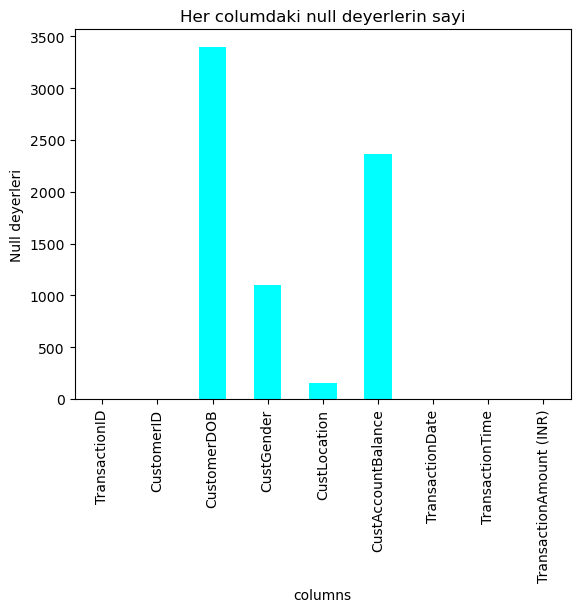

In [7]:
null.plot(kind='bar',cmap="cool")

plt.title("Her columdaki null deyerlerin sayi")
plt.xlabel("columns")
plt.ylabel('Null deyerleri');

In [8]:
def yoxla(df):
    A = []
    columns = df.columns

    for i in columns:
        isnull = df[i].isnull().sum()
        tayp = df[i].dtypes
        nunique = df[i].nunique()
        A.append([i,tayp,nunique,isnull])
        
    ad = pd.DataFrame(A)
    ad.columns = ['Columnns_name','Type','Nuniue','Isnull']
    return ad

yoxla(df)

,Columnns_name,Type,Nuniue,Isnull
0,TransactionID,object,1048567,0
1,CustomerID,object,884265,0
2,CustomerDOB,object,17254,3397
3,CustGender,object,3,1100
4,CustLocation,object,9355,151
5,CustAccountBalance,float64,161328,2369
6,TransactionDate,object,55,0
7,TransactionTime,int64,81918,0
8,TransactionAmount (INR),float64,93024,0


In [9]:
df['CustGender'].value_counts()

CustGender
M    765530
F    281936
T         1
Name: count, dtype: int64

<Axes: xlabel='CustGender', ylabel='count'>

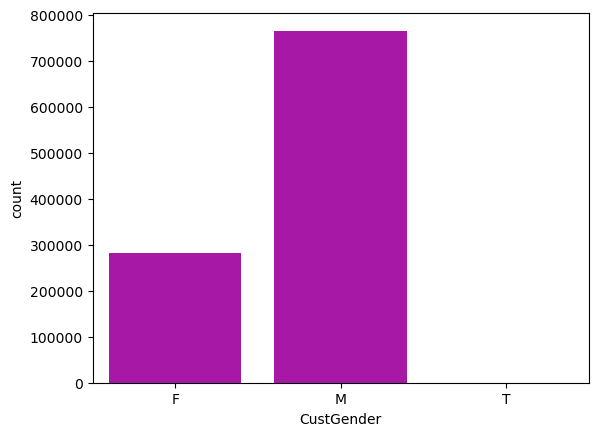

In [10]:
sns.countplot(x='CustGender',data=df,color='m')

In [11]:
df.fillna(df['CustGender']=='F',inplace = True)


In [12]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [13]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [14]:
df2 = df.copy()

In [15]:
df.dropna(subset=['CustLocation','CustomerDOB','CustAccountBalance'],inplace=True)

In [16]:
df = df[df['CustGender']!="T"]

<Axes: xlabel='CustGender', ylabel='count'>

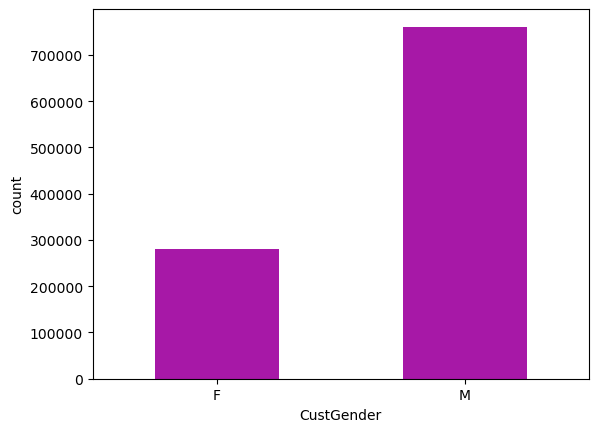

In [17]:
sns.countplot(x="CustGender",data=df,color='m',width=0.5)


In [18]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


<Axes: xlabel='CustAccountBalance'>

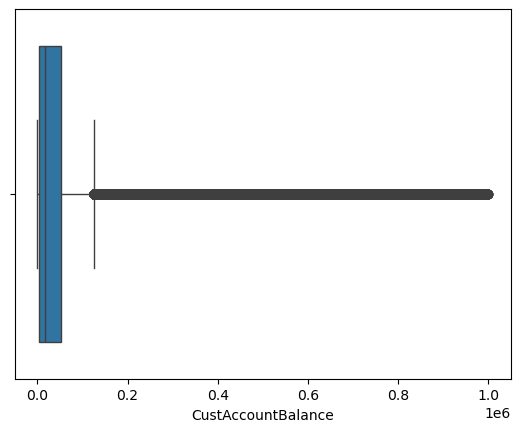

In [19]:
sns.boxplot(data=df.query("CustAccountBalance < 1000000"), x="CustAccountBalance")

In [20]:
df['TransactionAmount (INR)'].describe()

count    1.042650e+06
mean     1.566254e+03
std      6.559997e+03
min      0.000000e+00
25%      1.600000e+02
50%      4.570000e+02
75%      1.200000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64

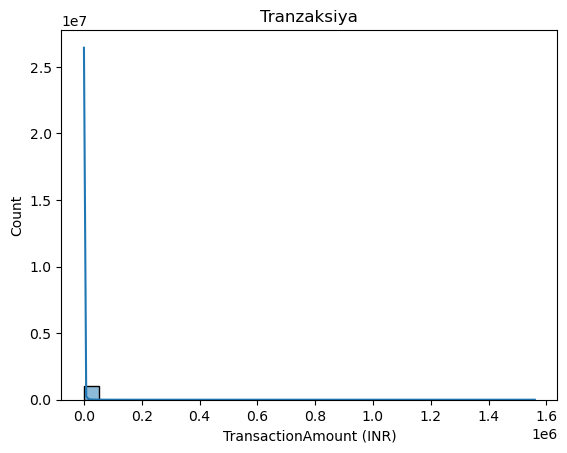

In [21]:
sns.histplot(df['TransactionAmount (INR)'], bins=30, kde=True)
plt.title('Tranzaksiya')
plt.show()

In [22]:
df['CustAccountBalance'].describe()

count    1.042650e+06
mean     1.149064e+05
std      8.463467e+05
min      0.000000e+00
25%      4.715510e+03
50%      1.674342e+04
75%      5.738717e+04
max      1.150355e+08
Name: CustAccountBalance, dtype: float64

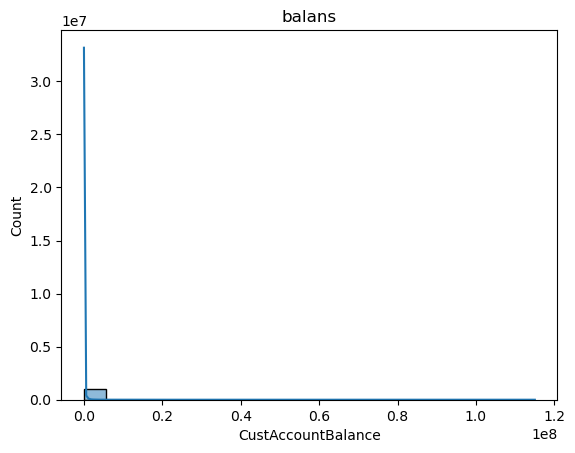

In [23]:
sns.histplot(df['CustAccountBalance'], bins=20, kde=True)
plt.title('balans')
plt.show()

Text(0.5, 1.0, 'Transaction Amount ve Account Balance')

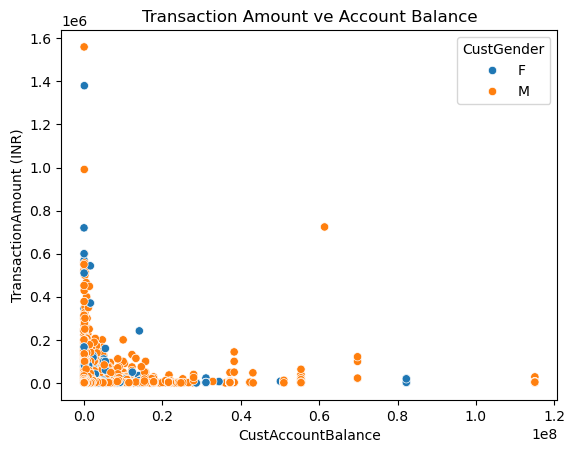

In [24]:
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', hue='CustGender', data=df)
plt.title('Transaction Amount ve Account Balance')                    

Text(0.5, 1.0, 'Transaction Amount Gender')

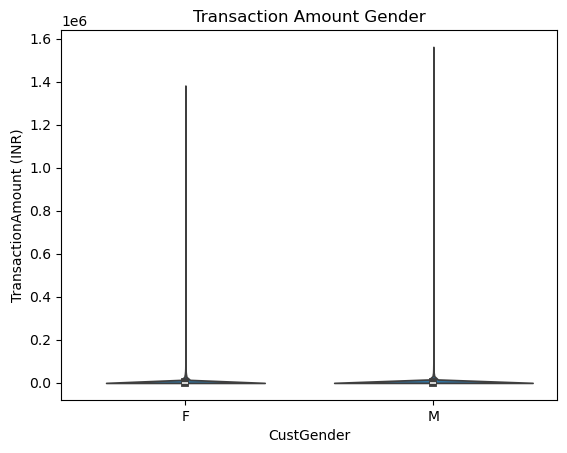

In [25]:
sns.violinplot(x='CustGender', y='TransactionAmount (INR)', data=df)
plt.title('Transaction Amount Gender')

In [26]:
# Frequency Encoding
location_counts = df['CustLocation'].value_counts()
df['CustLocationFreq'] = df['CustLocation'].map(location_counts)


C:\Users\user2\AppData\Local\Temp\ipykernel_16360\3984084498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustLocationFreq'] = df['CustLocation'].map(location_counts)


In [27]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,1580
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,862
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,102742
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,102742
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5,12969
...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0,84151
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0,4960
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0,22976
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,4442


In [28]:
df['CustLocationFreq'].nunique()

477

In [29]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Age'] = df['TransactionDate'].dt.year - df['CustomerDOB'].dt.year

C:\Users\user2\AppData\Local\Temp\ipykernel_16360\108976272.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
C:\Users\user2\AppData\Local\Temp\ipykernel_16360\108976272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])
C:\Users\user2\AppData\Local\Temp\ipykernel_16360\108976272.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TransactionDate'] = pd.to_da

In [30]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1580,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,862,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,102742,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,102742,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,12969,28
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,84151,26
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,4960,24
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,22976,27
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,4442,38


In [31]:
df.drop(df[df['Age']<18].index.tolist(),axis=0,inplace=True)

C:\Users\user2\AppData\Local\Temp\ipykernel_16360\444504589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Age']<18].index.tolist(),axis=0,inplace=True)


In [32]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1580,22
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,102742,20
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,12969,28
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,102742,24
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,102742,34
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,84151,26
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,4960,24
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,22976,27
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,4442,38


In [33]:
a = pd.DataFrame(df['CustomerDOB'].dt.year)
a[a['CustomerDOB']==1800]

,CustomerDOB
16,1800
22,1800
28,1800
35,1800
151,1800
...,...
1048443,1800
1048452,1800
1048531,1800
1048533,1800


In [34]:
#df.drop(df[df["Age"]==216].index.tolist(),axis=0,inplace=True)

C:\Users\user2\AppData\Local\Temp\ipykernel_16360\2867804565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df["Age"]==216].index.tolist(),axis=0,inplace=True)


In [35]:
mean_age = df.loc[df['Age'] !=216,'Age'].mean()

In [36]:
df.loc[df['Age']==216,'Age'] = mean_age

In [37]:
df['Age'].max()

42.0

In [38]:
df['CustLocation'].value_counts()

CustLocation
MUMBAI                       87718
BANGALORE                    71464
NEW DELHI                    66874
GURGAON                      63564
DELHI                        61118
                             ...  
KAMALPUR                         1
CHAKALA ANDHERI -E MUMBAI        1
CORPORATION THANE                1
SANPADA S O THANE                1
IMPERIA THANE WEST               1
Name: count, Length: 7565, dtype: int64

C:\Users\user2\AppData\Local\Temp\ipykernel_16360\2372968198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.countplot(y='CustLocation',data=df,palette='rocket', order = df['CustLocation'].value_counts()[:20].index)


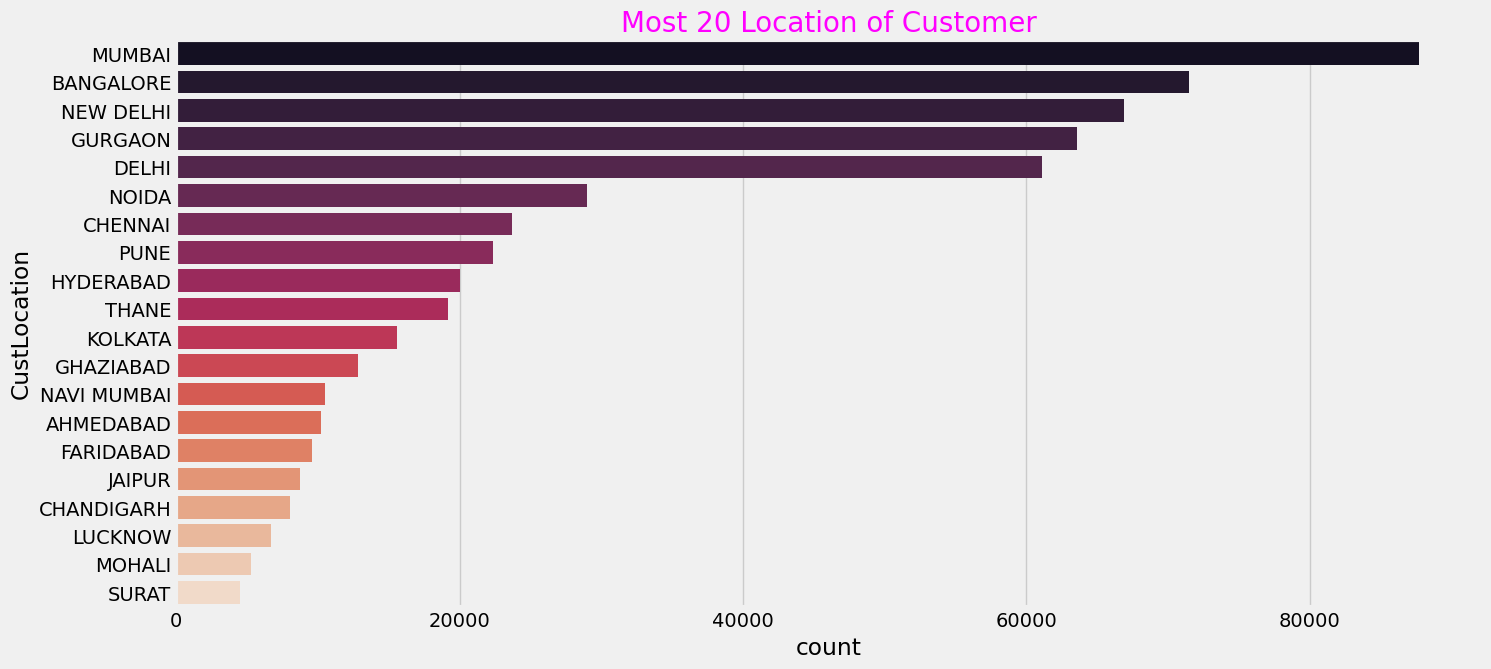

In [39]:
plt.figure(figsize=(15,7))
chart=sns.countplot(y='CustLocation',data=df,palette='rocket', order = df['CustLocation'].value_counts()[:20].index)
plt.title("Most 20 Location of Customer",
          fontsize='20',
          color='magenta');

In [40]:
df2 = df

In [41]:
df2

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1580,22.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,102742,20.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,12969,28.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,102742,24.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,102742,34.0
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,84151,26.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,4960,24.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,22976,27.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,4442,38.0


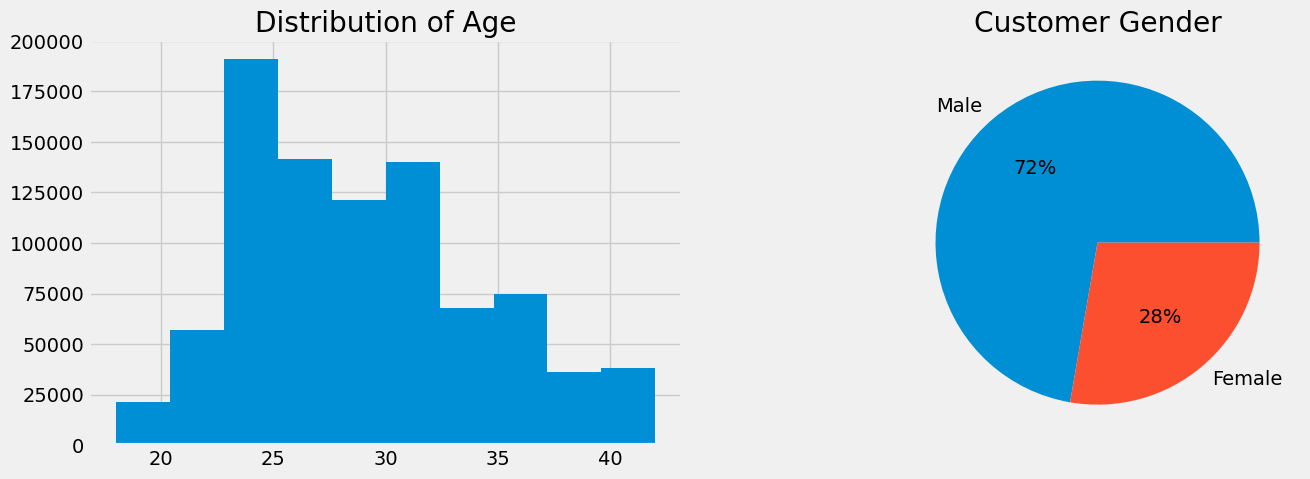

In [42]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(15,5))

ax[0].hist(x=df['Age'])
ax[0].set_title("Distribution of Age")
ax[1].pie(df['CustGender'].value_counts(),autopct='%1.f%%',labels=['Male','Female'])
ax[1].set_title("Customer Gender");
#plt.tight_layout();

In [43]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1580,22.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,102742,20.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,12969,28.0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,102742,24.0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,102742,34.0
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,84151,26.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,4960,24.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,22976,27.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,4442,38.0


In [44]:
print(df['CustAccountBalance'].min())
print(df['CustAccountBalance'].median())
print(df['CustAccountBalance'].max())

0.0
14673.54
43165555.53


In [45]:
print(df['TransactionAmount (INR)'].min())
print(df['TransactionAmount (INR)'].median())
print(df['TransactionAmount (INR)'].max())

0.0
399.0
1560034.99


In [46]:
df[df['CustAccountBalance']>1000000].sort_values(by="TransactionAmount (INR)",ascending=False).describe()

,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age
count,10174,1.017400e+04,10174,10174.000000,10174.000000,10174.000000,10174.000000
mean,1982-11-19 22:51:04.281501824,2.364108e+06,2016-07-28 22:58:25.877727488,157257.507470,3692.440066,52365.110773,33.620110
min,1974-01-01 00:00:00,1.000000e+06,2016-01-08 00:00:00,8.000000,0.000000,1.000000,18.000000
25%,1978-10-02 00:00:00,1.180484e+06,2016-07-08 00:00:00,130005.000000,398.572500,5704.000000,30.000000
50%,1982-10-06 00:00:00,1.559585e+06,2016-08-21 00:00:00,164211.500000,1119.000000,70549.000000,34.000000
75%,1986-07-12 12:00:00,2.361484e+06,2016-09-09 00:00:00,195225.500000,2748.082500,84151.000000,38.000000
max,1998-10-29 00:00:00,4.316556e+07,2016-12-09 00:00:00,235931.000000,350000.000000,102742.000000,42.000000
std,NaN,2.451314e+06,NaN,50533.314874,11366.170605,40198.491851,5.108445


In [47]:
df[(df['CustAccountBalance']<1000000) & (df['CustAccountBalance']>500000)]['TransactionAmount (INR)'].median()

993.0

In [48]:
df[(df['CustAccountBalance']<500000) & (df['CustAccountBalance']>10000)]['TransactionAmount (INR)'].median()

500.0

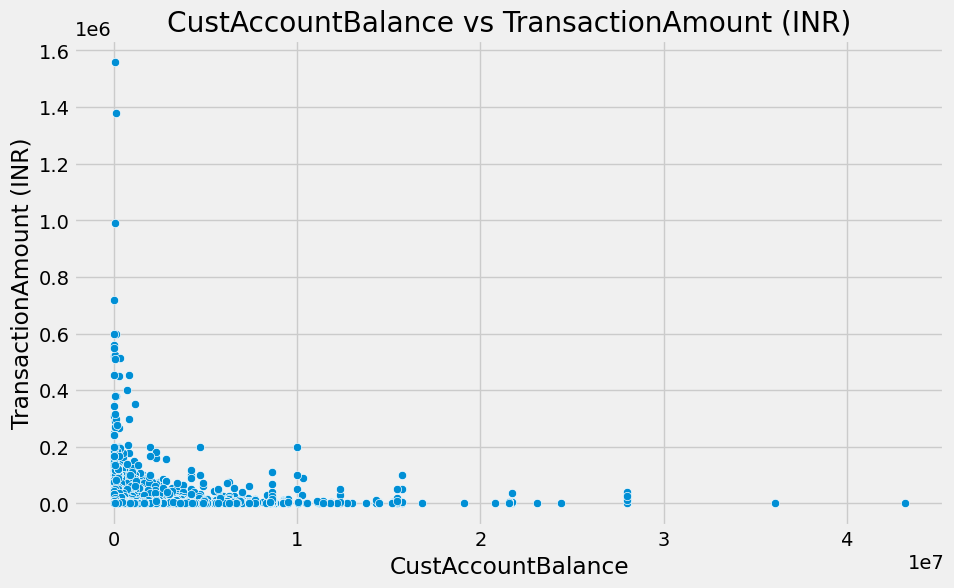

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CustAccountBalance', y='TransactionAmount (INR)', data=df)
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.title('CustAccountBalance vs TransactionAmount (INR)')
plt.show()


In [50]:
df.drop(df[(df['TransactionAmount (INR)']==0) & (df['CustAccountBalance']>10000)].index.tolist(),axis=0,inplace=True)

C:\Users\user2\AppData\Local\Temp\ipykernel_16360\3728968493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['TransactionAmount (INR)']==0) & (df['CustAccountBalance']>10000)].index.tolist(),axis=0,inplace=True)


In [51]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
CustLocationFreq           0
Age                        0
dtype: int64

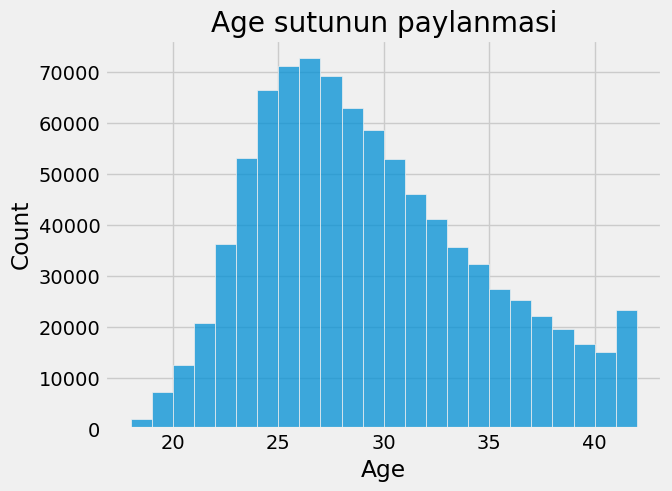

In [52]:
sns.histplot(x = 'Age',data=df,bins=24)

plt.title("Age sutunun paylanmasi")
plt.xlabel("Age");

<Axes: xlabel='Age', ylabel='CustAccountBalance'>

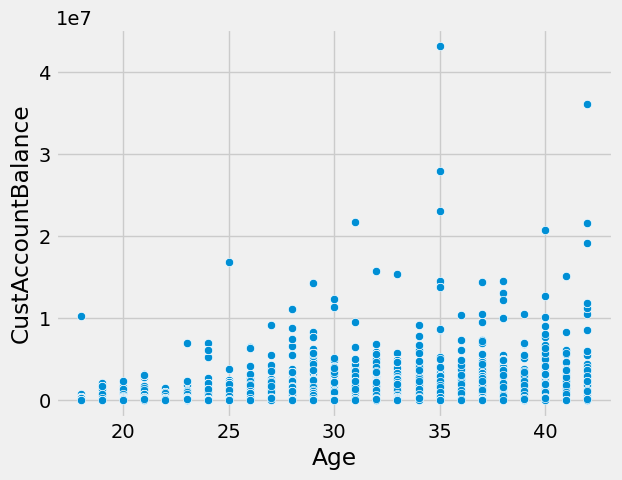

In [53]:
sns.scatterplot(y='CustAccountBalance', x='Age', data=df)

In [54]:
df[df['CustAccountBalance']>40000000]['Age'].median()

35.0

In [55]:
df['Month'] = df['TransactionDate'].dt.month

C:\Users\user2\AppData\Local\Temp\ipykernel_16360\1941834559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['TransactionDate'].dt.month


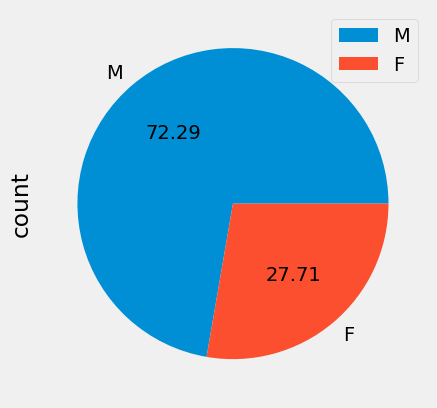

In [56]:
df['CustGender'].value_counts().plot(kind='pie',autopct='%.2f')
plt.legend()

In [57]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age,Month
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1580,22.0,2
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,102742,20.0,2
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,12969,28.0,2
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,102742,24.0,2
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,102742,34.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,84151,26.0,9
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,4960,24.0,9
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,22976,27.0,9
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,4442,38.0,9


In [58]:
data1 = df[['CustAccountBalance','Month']]

In [59]:
groupby1 = data1.groupby(['Month']).agg(['median','count'])

In [60]:
groupby1

CustAccountBalance        
                  median   count
Month                           
1              13348.190   36643
2              13267.690   37539
3              14946.490   40286
4              15025.905   40496
5              14104.610   36307
6              14421.580   39767
7              14135.520   41760
8              15325.610  361507
9              14462.010  134329
10             14159.210   43740
11             14305.250   40448
12             13319.600   36646

<Axes: xlabel='Month'>

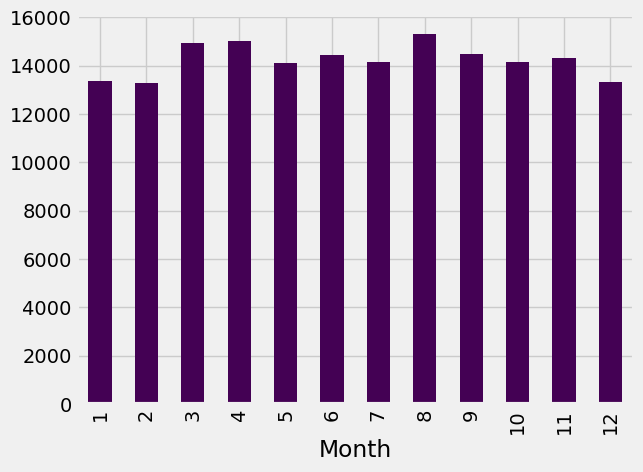

In [61]:
groupby1['CustAccountBalance','median'].plot(kind='bar',colormap='viridis')

<Axes: xlabel='Month'>

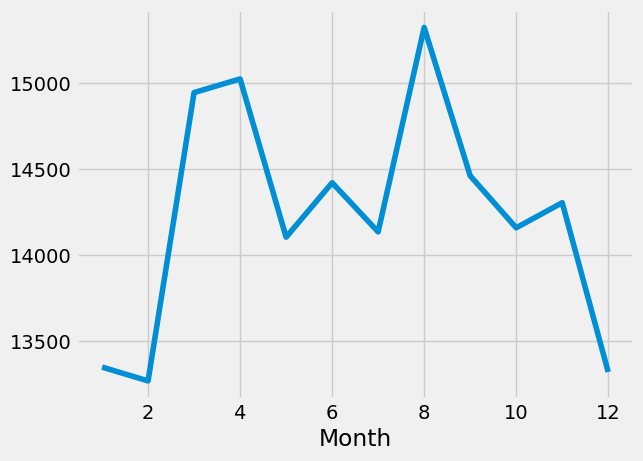

In [62]:
groupby1['CustAccountBalance','median'].plot(kind='line')

<Axes: xlabel='Month'>

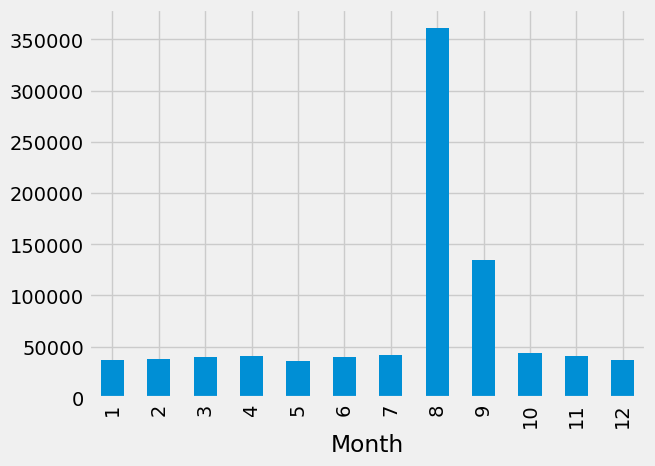

In [63]:
groupby1['CustAccountBalance','count'].plot(kind='bar')

In [64]:
gender = pd.get_dummies(df['CustGender'],dtype=int,prefix='Gender',drop_first=True)

In [65]:
df = pd.concat([df,gender],axis=1)

In [66]:
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age,Month,Gender_M
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,1580,22.0,2,0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,102742,20.0,2,0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,12969,28.0,2,0
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,102742,24.0,2,0
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,170537,148.0,102742,34.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,84151,26.0,9,1
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,4960,24.0,9,1
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,22976,27.0,9,1
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,4442,38.0,9,1


In [68]:
df.nunique()

TransactionID              889468
CustomerID                 768677
CustomerDOB                  8959
CustGender                      2
CustLocation                 7564
CustAccountBalance         134657
TransactionDate                55
TransactionTime             80734
TransactionAmount (INR)     76451
CustLocationFreq              477
Age                            25
Month                          12
Gender_M                        2
dtype: int64

In [69]:
df.drop(columns=['CustLocation','CustGender'],axis=1,inplace=True)

In [70]:
df

,TransactionID,CustomerID,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age,Month,Gender_M
0,T1,C5841053,1994-10-01,17819.05,2016-02-08,143207,25.0,1580,22.0,2,0
2,T3,C4417068,1996-11-26,17874.44,2016-02-08,142712,459.0,102742,20.0,2,0
4,T5,C9031234,1988-03-24,6714.43,2016-02-08,181156,1762.5,12969,28.0,2,0
6,T7,C7126560,1992-01-26,973.46,2016-02-08,173806,566.0,102742,24.0,2,0
7,T8,C1220223,1982-01-27,95075.54,2016-02-08,170537,148.0,102742,34.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,7635.19,2016-09-18,184824,799.0,84151,26.0,9,1
1048563,T1048564,C6459278,1992-02-20,27311.42,2016-09-18,183734,460.0,4960,24.0,9,1
1048564,T1048565,C6412354,1989-05-18,221757.06,2016-09-18,183313,770.0,22976,27.0,9,1
1048565,T1048566,C6420483,1978-08-30,10117.87,2016-09-18,184706,1000.0,4442,38.0,9,1


Text(0.5, 1.0, 'Correlation Matrix')

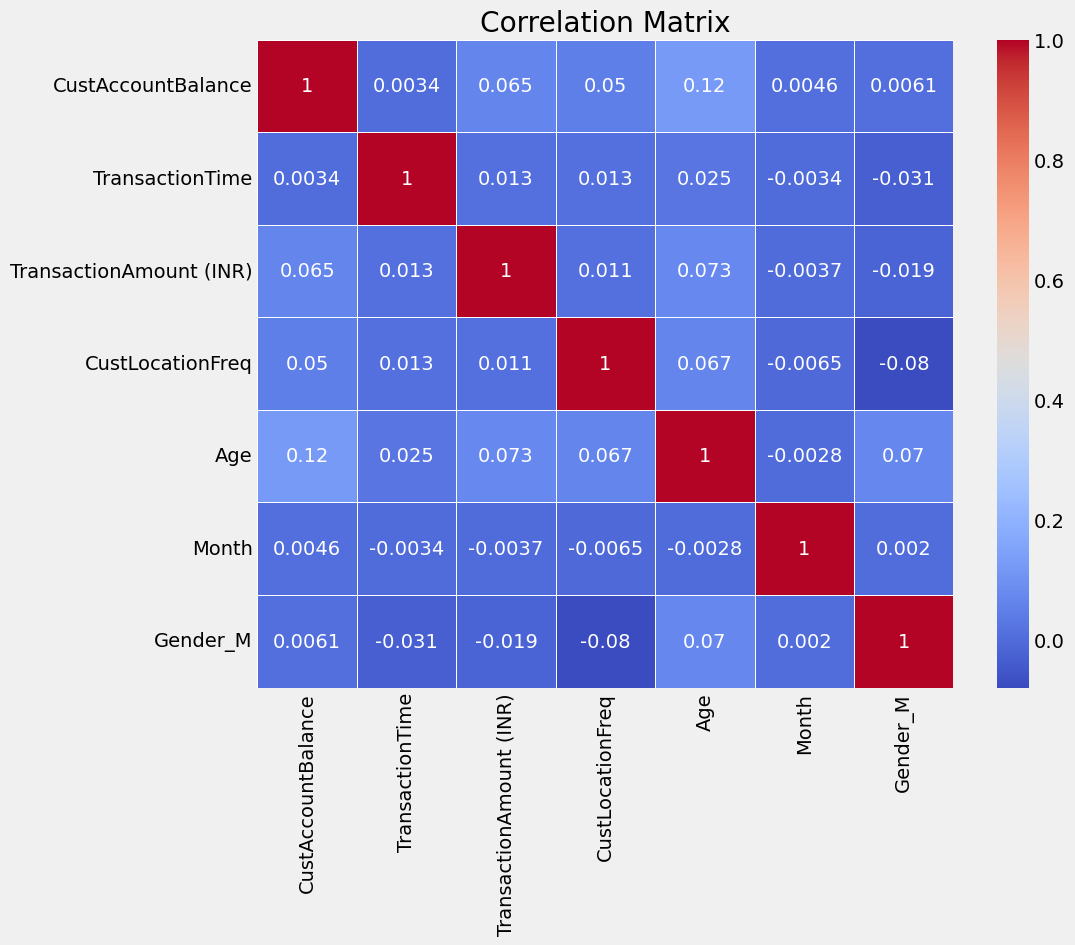

In [71]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')

In [72]:
X = df[["CustAccountBalance","TransactionAmount (INR)",'Age']].values

In [73]:
X

array([[1.7819050e+04, 2.5000000e+01, 2.2000000e+01],
       [1.7874440e+04, 4.5900000e+02, 2.0000000e+01],
       [6.7144300e+03, 1.7625000e+03, 2.8000000e+01],
       ...,
       [2.2175706e+05, 7.7000000e+02, 2.7000000e+01],
       [1.0117870e+04, 1.0000000e+03, 3.8000000e+01],
       [7.5734420e+04, 1.1660000e+03, 3.2000000e+01]])

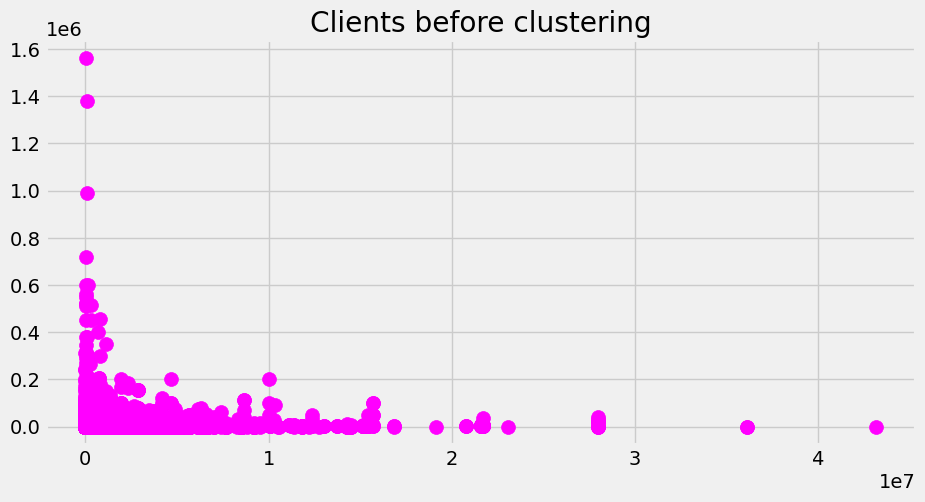

In [74]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='magenta',label='All customers')
plt.title('Clients before clustering')

plt.show()

In [75]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [76]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [77]:
kmeans.inertia_

2.0396000572010384e+16

In [78]:
X = df[["CustAccountBalance","TransactionAmount (INR)",'Age']]

In [79]:
pcaa = PCA(n_components=2)
a = pcaa.fit_transform(X)

In [80]:
print(pcaa.explained_variance_ratio_)

[9.99791208e-01 2.08791872e-04]


In [81]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [82]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

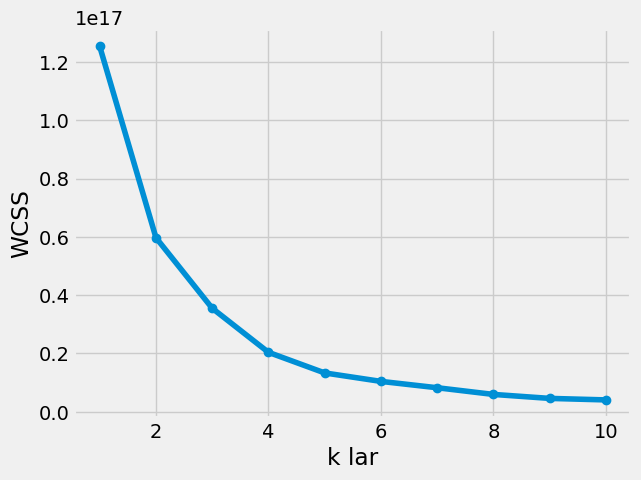

In [83]:
wss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wss[i] = kmeans.inertia_
     
plt.plot(wss.keys(), wss.values(), '-o')
plt.xlabel("k lar")
plt.ylabel('WCSS')
plt.show()

In [84]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [85]:
kmeans.inertia_

4076108333451249.0

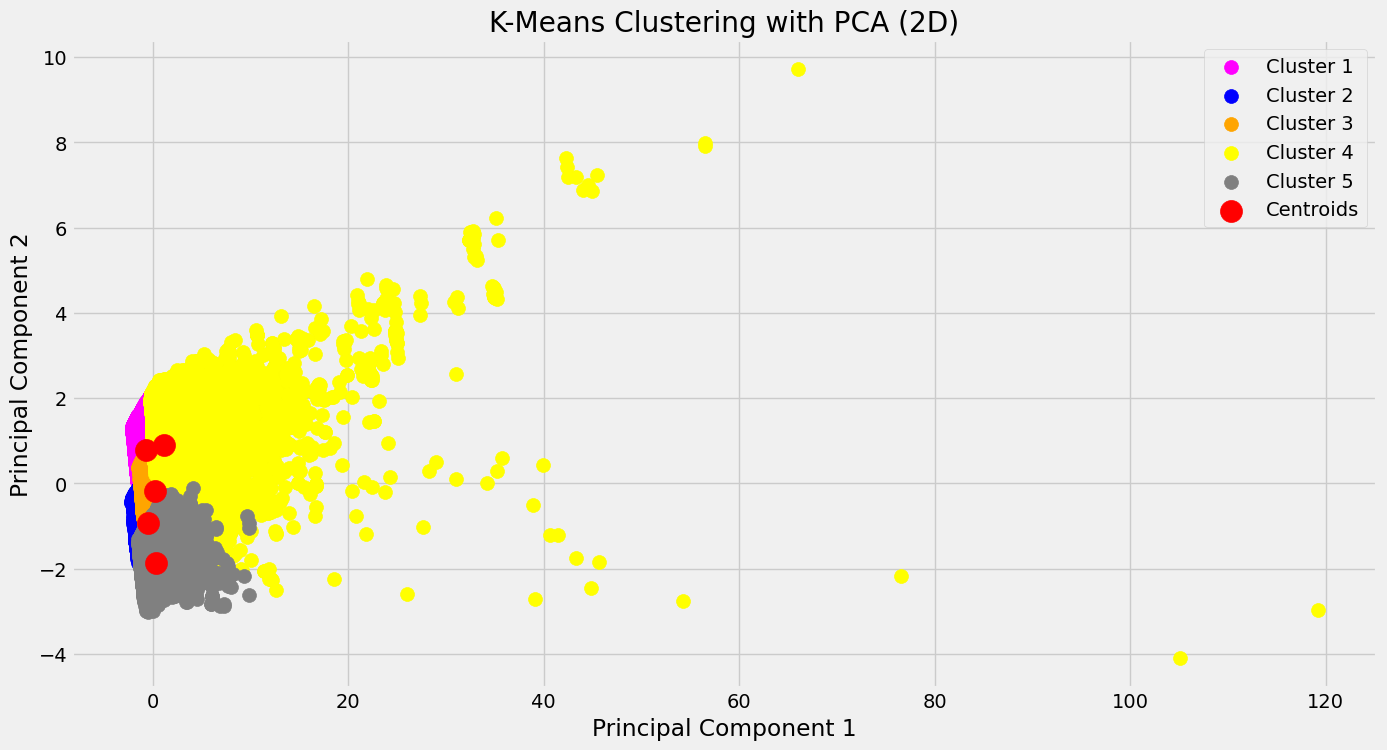

In [86]:
features = ["CustAccountBalance", "TransactionTime", "TransactionAmount (INR)", 'CustLocationFreq', 'Age', 'Gender_M']
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
A = pca.fit_transform(X_scaled)

centers = pca.transform(kmeans.cluster_centers_)

# PCA -ni 2D olarak vizuallasdirma
fig = plt.figure(figsize=(15, 8))

# Kümeleri plotlama
plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1],s=100, c='magenta', label='Cluster 1')
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1],s=100, c='blue', label='Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1],s=100, c='orange', label='Cluster 3')
plt.scatter(A[y_kmeans == 3, 0], A[y_kmeans == 3, 1],s=100, c='yellow', label='Cluster 4')
plt.scatter(A[y_kmeans == 4, 0], A[y_kmeans == 4, 1],s=100, c='gray', label='Cluster 5')

plt.scatter(centers[:, 0],centers[:, 1],s=250, c='red', label='Centroids')

plt.title('K-Means Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


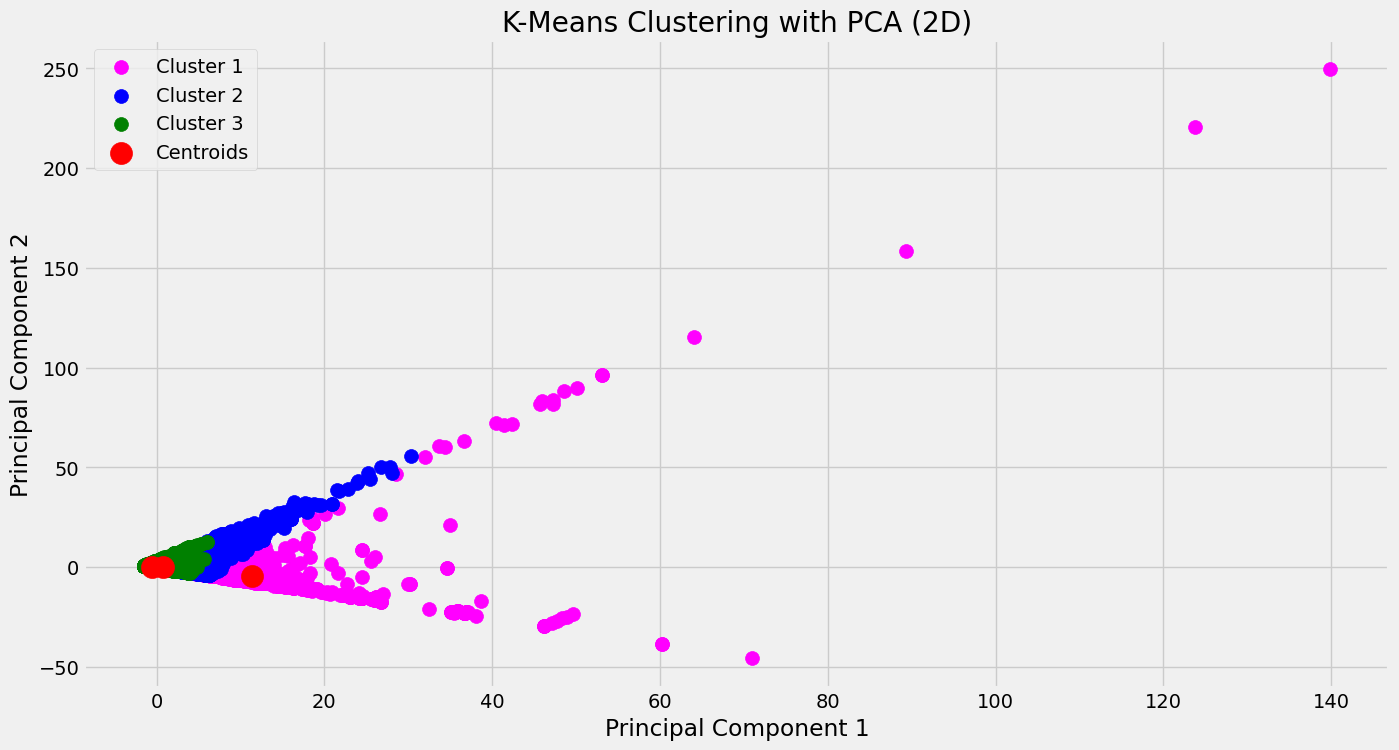

In [87]:
features = ["CustAccountBalance", "TransactionAmount (INR)", 'Age',]
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
A = pca.fit_transform(X_scaled)

centers = pca.transform(kmeans.cluster_centers_)

fig = plt.figure(figsize=(15, 8))


plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1],s=100, c='magenta', label='Cluster 1')
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1],s=100, c='blue', label='Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1],s=100, c='green', label='Cluster 3')


plt.scatter(centers[:, 0],centers[:, 1],s=250, c='red', label='Centroids')

plt.title('K-Means Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [88]:
df["Cluster"] = y_kmeans

In [89]:
df['Cluster'].value_counts()

Cluster
2    528042
1    359582
0      1844
Name: count, dtype: int64

In [90]:
X

array([[1.7819050e+04, 2.5000000e+01, 2.2000000e+01],
       [1.7874440e+04, 4.5900000e+02, 2.0000000e+01],
       [6.7144300e+03, 1.7625000e+03, 2.8000000e+01],
       ...,
       [2.2175706e+05, 7.7000000e+02, 2.7000000e+01],
       [1.0117870e+04, 1.0000000e+03, 3.8000000e+01],
       [7.5734420e+04, 1.1660000e+03, 3.2000000e+01]])

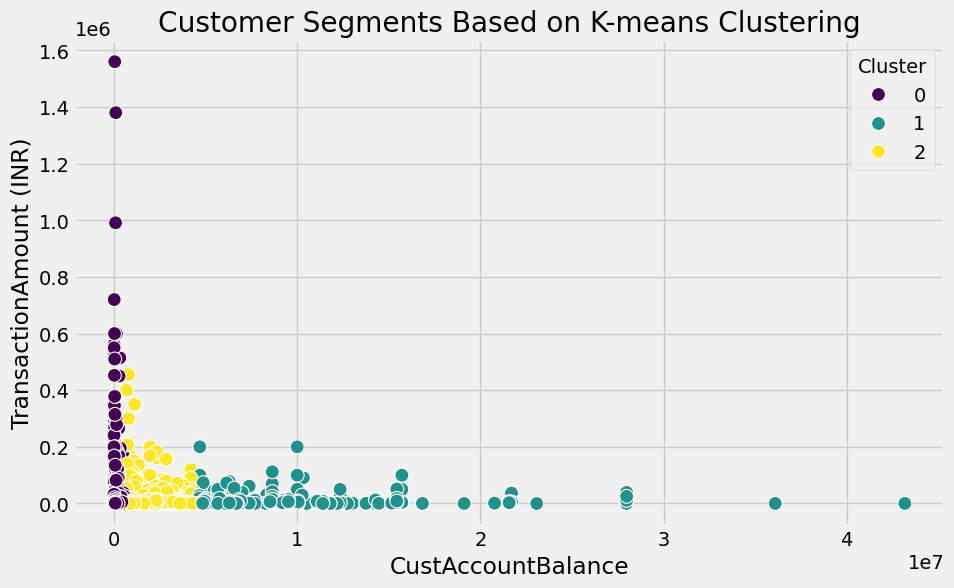

In [91]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

#Vizuallasdirma
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CustAccountBalance', y='TransactionAmount (INR)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments Based on K-means Clustering')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

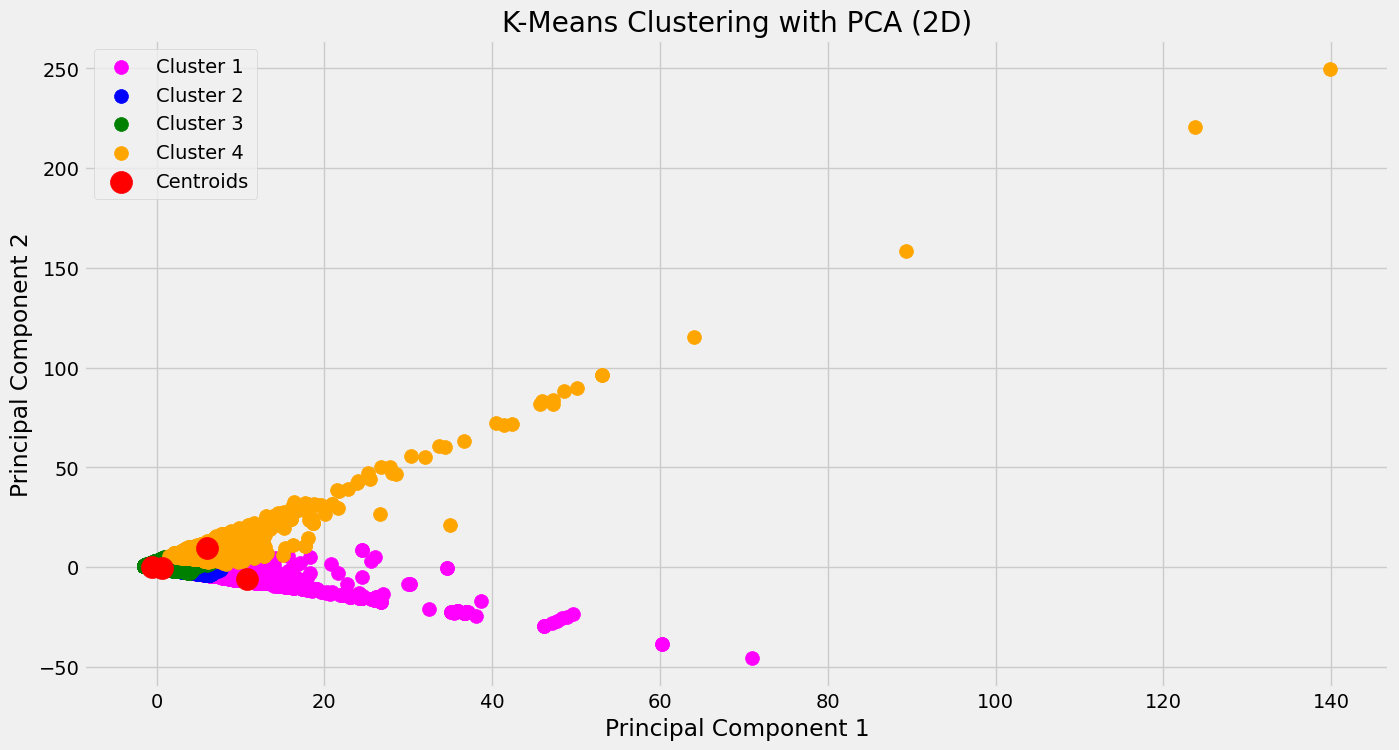

In [92]:
features = ["CustAccountBalance", "TransactionAmount (INR)", 'Age',]
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
A = pca.fit_transform(X_scaled)

centers = pca.transform(kmeans.cluster_centers_)

fig = plt.figure(figsize=(15, 8))


plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1],s=100, c='magenta', label='Cluster 1')
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1],s=100, c='blue', label='Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1],s=100, c='green', label='Cluster 3')
plt.scatter(A[y_kmeans == 3, 0], A[y_kmeans == 3, 1],s=100, c='orange', label='Cluster 4')

plt.scatter(centers[:, 0],centers[:, 1],s=250, c='red', label='Centroids')

plt.title('K-Means Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [93]:
df

,TransactionID,CustomerID,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age,Month,Gender_M,Cluster
0,T1,C5841053,1994-10-01,17819.05,2016-02-08,143207,25.0,1580,22.0,2,0,0
2,T3,C4417068,1996-11-26,17874.44,2016-02-08,142712,459.0,102742,20.0,2,0,0
4,T5,C9031234,1988-03-24,6714.43,2016-02-08,181156,1762.5,12969,28.0,2,0,0
6,T7,C7126560,1992-01-26,973.46,2016-02-08,173806,566.0,102742,24.0,2,0,0
7,T8,C1220223,1982-01-27,95075.54,2016-02-08,170537,148.0,102742,34.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,7635.19,2016-09-18,184824,799.0,84151,26.0,9,1,0
1048563,T1048564,C6459278,1992-02-20,27311.42,2016-09-18,183734,460.0,4960,24.0,9,1,0
1048564,T1048565,C6412354,1989-05-18,221757.06,2016-09-18,183313,770.0,22976,27.0,9,1,0
1048565,T1048566,C6420483,1978-08-30,10117.87,2016-09-18,184706,1000.0,4442,38.0,9,1,0


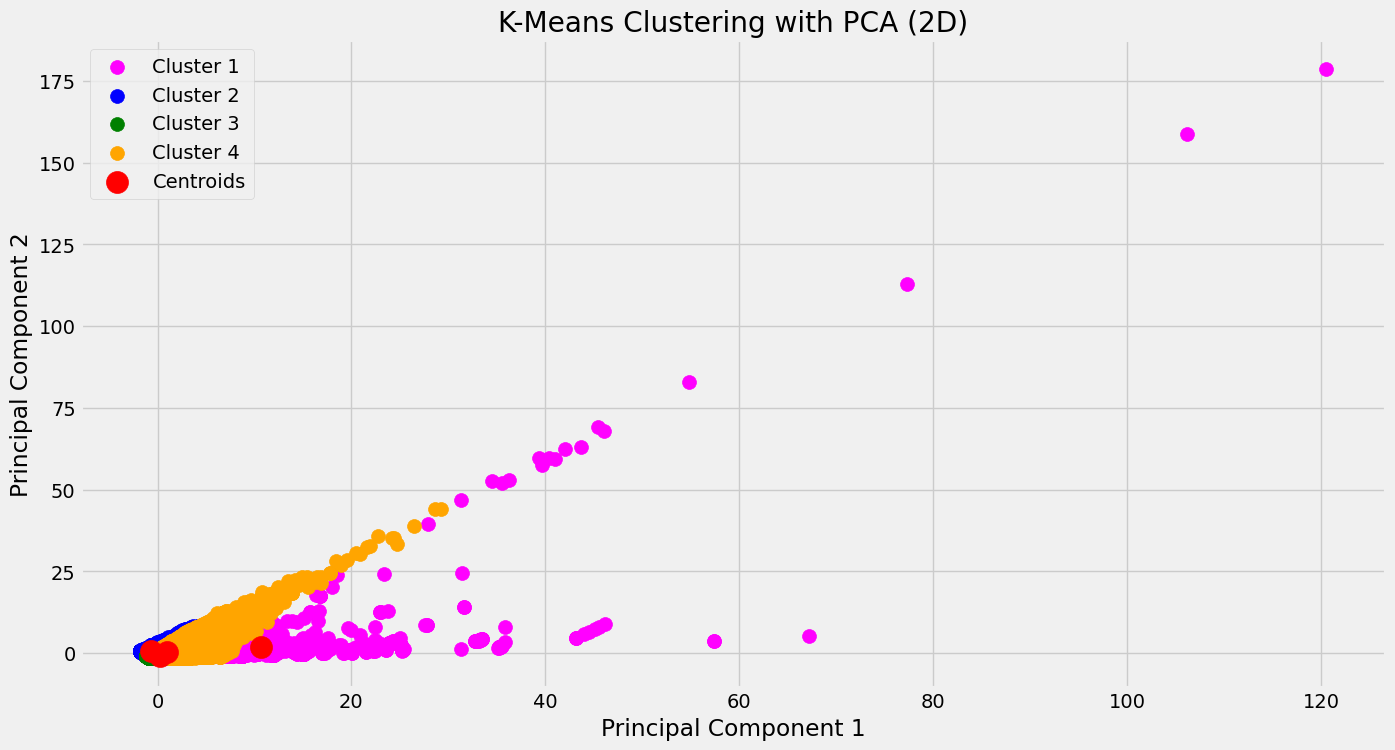

In [94]:
features = ["CustAccountBalance", "TransactionAmount (INR)", 'Age','CustLocationFreq']
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
A = pca.fit_transform(X_scaled)

centers = pca.transform(kmeans.cluster_centers_)

fig = plt.figure(figsize=(15, 8))


plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1],s=100, c='magenta', label='Cluster 1')
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1],s=100, c='blue', label='Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1],s=100, c='green', label='Cluster 3')
plt.scatter(A[y_kmeans == 3, 0], A[y_kmeans == 3, 1],s=100, c='orange', label='Cluster 4')

plt.scatter(centers[:, 0],centers[:, 1],s=250, c='red', label='Centroids')

plt.title('K-Means Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


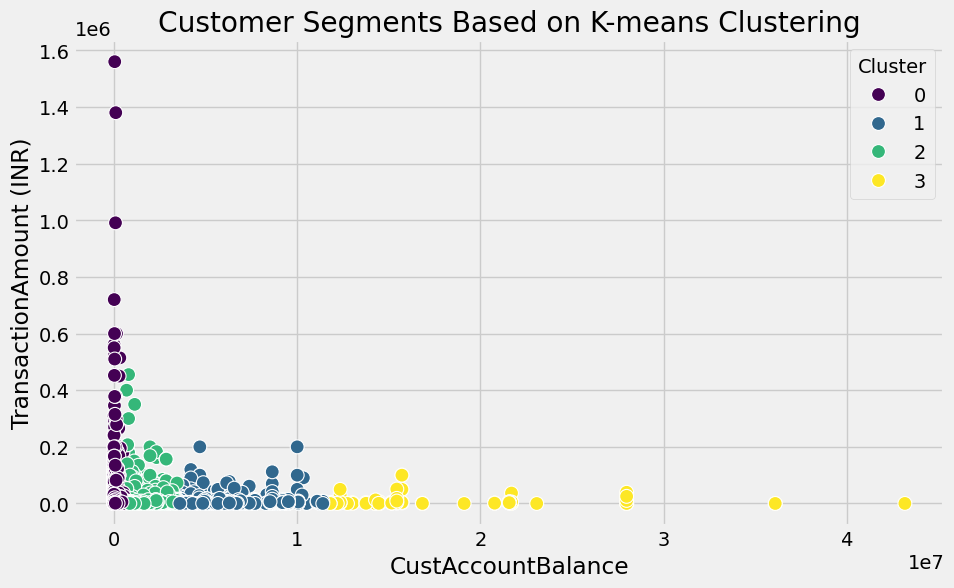

In [95]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

#Vizuallasdirma
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CustAccountBalance', y='TransactionAmount (INR)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments Based on K-means Clustering')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

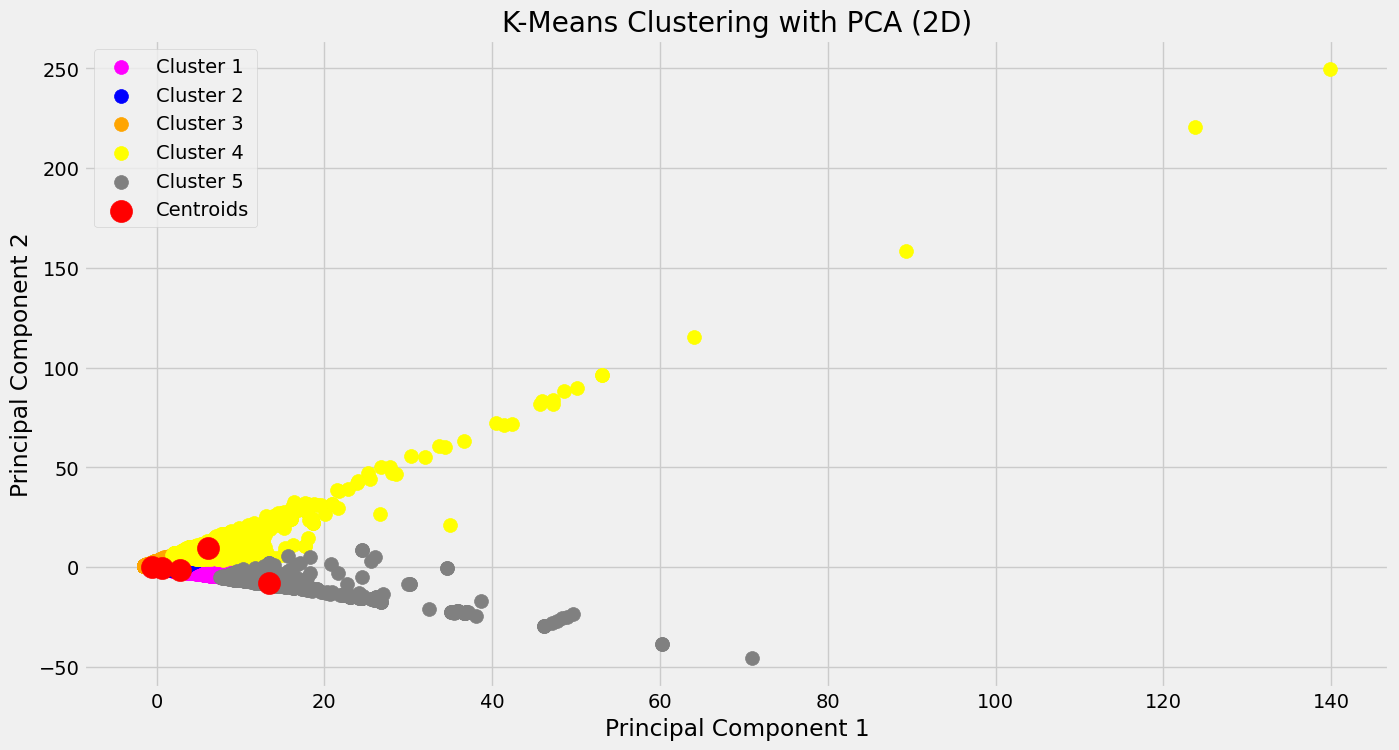

In [96]:
features = ["CustAccountBalance","TransactionAmount (INR)", 'Age']
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
A = pca.fit_transform(X_scaled)

centers = pca.transform(kmeans.cluster_centers_)


fig = plt.figure(figsize=(15, 8))

# plotla Vizuallasdirma
plt.scatter(A[y_kmeans == 0, 0], A[y_kmeans == 0, 1],s=100, c='magenta', label='Cluster 1')
plt.scatter(A[y_kmeans == 1, 0], A[y_kmeans == 1, 1],s=100, c='blue', label='Cluster 2')
plt.scatter(A[y_kmeans == 2, 0], A[y_kmeans == 2, 1],s=100, c='orange', label='Cluster 3')
plt.scatter(A[y_kmeans == 3, 0], A[y_kmeans == 3, 1],s=100, c='yellow', label='Cluster 4')
plt.scatter(A[y_kmeans == 4, 0], A[y_kmeans == 4, 1],s=100, c='gray', label='Cluster 5')

plt.scatter(centers[:, 0],centers[:, 1],s=250, c='red', label='Centroids')

plt.title('K-Means Clustering with PCA (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score

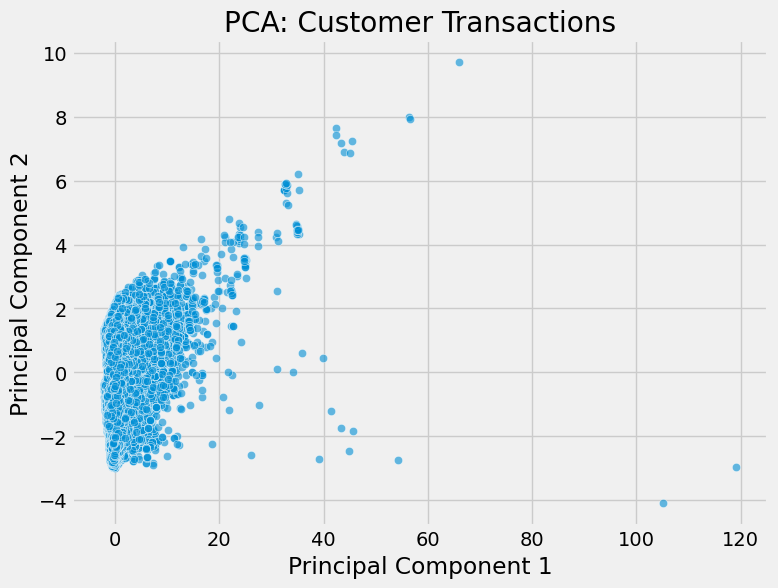

In [98]:
features = ["CustAccountBalance", "TransactionTime", "TransactionAmount (INR)", 'CustLocationFreq', 'Age', 'Gender_M']
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

df['PC1'] = principalDf['PC1']
df['PC2'] = principalDf['PC2']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df, alpha=0.6)
plt.title('PCA: Customer Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


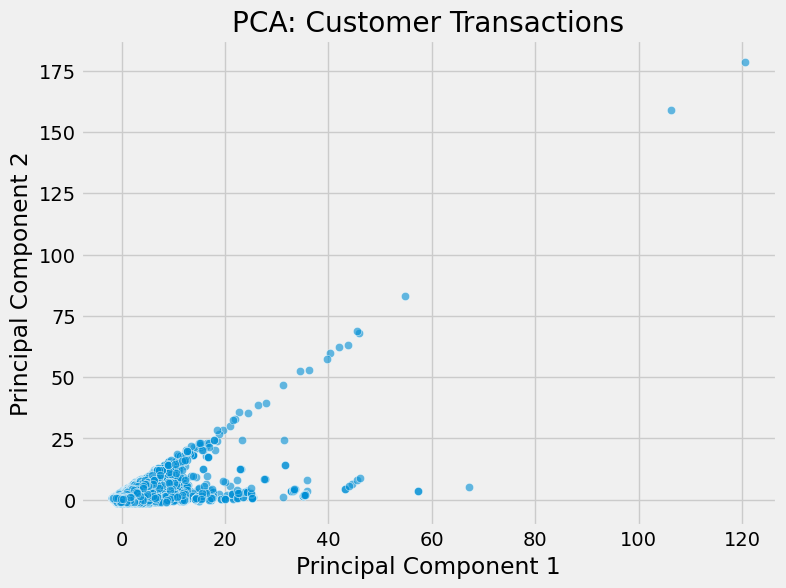

In [99]:
features = ["CustAccountBalance", "TransactionAmount (INR)", 'CustLocationFreq', 'Age']
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

df['PC1'] = principalDf['PC1']
df['PC2'] = principalDf['PC2']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df, alpha=0.6)
plt.title('PCA: Customer Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [100]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30179299, 0.24732107])

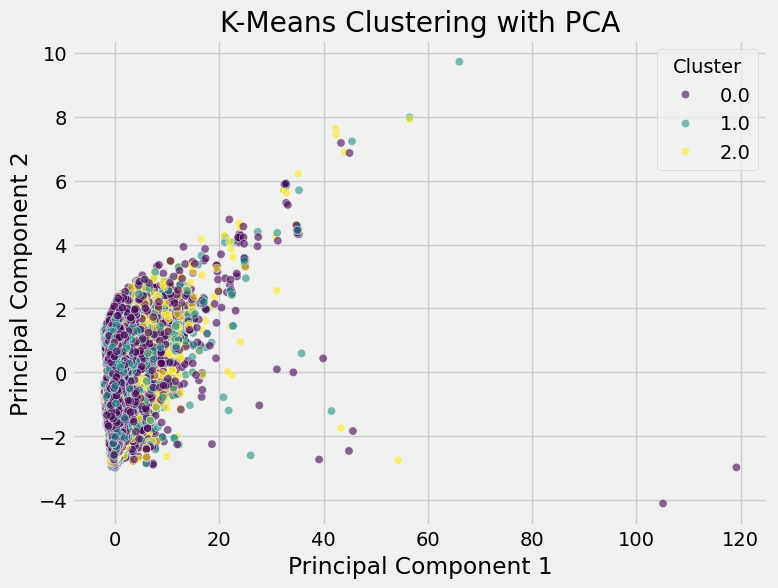

In [101]:
features = ["CustAccountBalance", "TransactionTime", "TransactionAmount (INR)", 'CustLocationFreq', 'Age', 'Gender_M']
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(X_scaled)


df['Cluster'] = kmeans.labels_


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])


principalDf['Cluster'] = df['Cluster']


plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principalDf, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


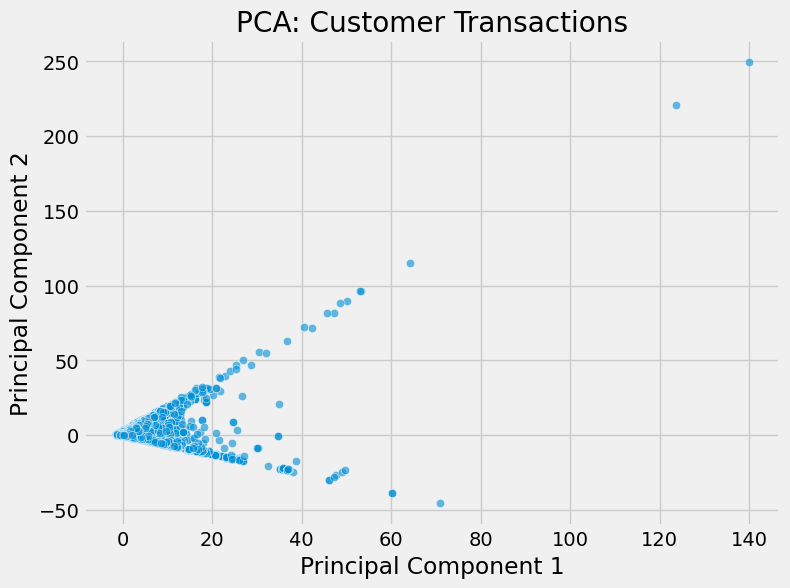

In [102]:
features = ["CustAccountBalance", "TransactionAmount (INR)", 'Age']
X = df[features].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])


df['PC1'] = principalDf['PC1']
df['PC2'] = principalDf['PC2']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df, alpha=0.6)
plt.title('PCA: Customer Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [103]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.39243448, 0.31546275])

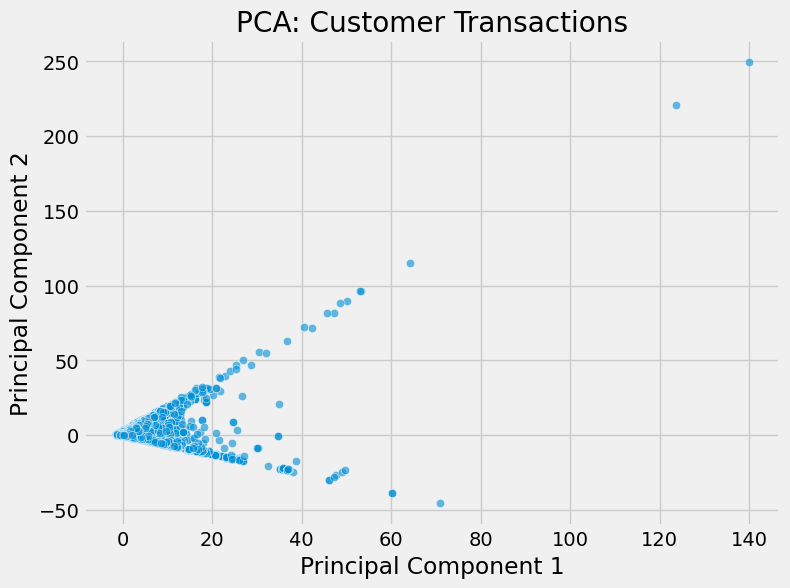

In [104]:
features = ["CustAccountBalance", "TransactionAmount (INR)", 'Age']
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

df['PC1'] = principalDf['PC1']
df['PC2'] = principalDf['PC2']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=df, alpha=0.6)
plt.title('PCA: Customer Transactions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [105]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.39243448, 0.31546275])

In [106]:
X = df[["CustAccountBalance","TransactionAmount (INR)",'Age']]

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X)

In [108]:
x_pca

array([[-6.15388898e+04, -1.20137003e+03,  6.71367208e+00],
       [-6.14830912e+04, -7.67422506e+02,  8.74157990e+00],
       [-7.26418690e+04,  5.46585136e+02,  8.06335087e-01],
       ...,
       [ 1.42399731e+05, -6.48387925e+02,  2.10469073e+00],
       [-6.92391484e+04, -2.19118393e+02, -9.23680396e+00],
       [-3.62247119e+03, -1.14900130e+02, -3.11571817e+00]])

In [109]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])

In [110]:
features

,pca1,pca2,pca3
0,-61538.889840,-1201.370032,6.713672
1,-61483.091235,-767.422506,8.741580
2,-72641.868964,546.585136,0.806335
3,-78383.962991,-644.509176,4.719989
4,15717.681747,-1151.110184,-5.148405
...,...,...,...
889463,-71722.016559,-417.781505,2.746135
889464,-52046.114470,-775.307641,4.757529
889465,142399.731226,-648.387925,2.104691
889466,-69239.148387,-219.118393,-9.236804


In [111]:
df

,TransactionID,CustomerID,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age,Month,Gender_M,Cluster,PC1,PC2
0,T1,C5841053,1994-10-01,17819.05,2016-02-08,143207,25.0,1580,22.0,2,0,1,-1.025595,0.237873
2,T3,C4417068,1996-11-26,17874.44,2016-02-08,142712,459.0,102742,20.0,2,0,1,-0.181846,0.201868
4,T5,C9031234,1988-03-24,6714.43,2016-02-08,181156,1762.5,12969,28.0,2,0,1,0.526058,-0.476713
6,T7,C7126560,1992-01-26,973.46,2016-02-08,173806,566.0,102742,24.0,2,0,1,0.154697,-0.249932
7,T8,C1220223,1982-01-27,95075.54,2016-02-08,170537,148.0,102742,34.0,2,1,0,0.459828,-0.409961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,7635.19,2016-09-18,184824,799.0,84151,26.0,9,1,0,NaN,NaN
1048563,T1048564,C6459278,1992-02-20,27311.42,2016-09-18,183734,460.0,4960,24.0,9,1,0,NaN,NaN
1048564,T1048565,C6412354,1989-05-18,221757.06,2016-09-18,183313,770.0,22976,27.0,9,1,0,NaN,NaN
1048565,T1048566,C6420483,1978-08-30,10117.87,2016-09-18,184706,1000.0,4442,38.0,9,1,0,NaN,NaN


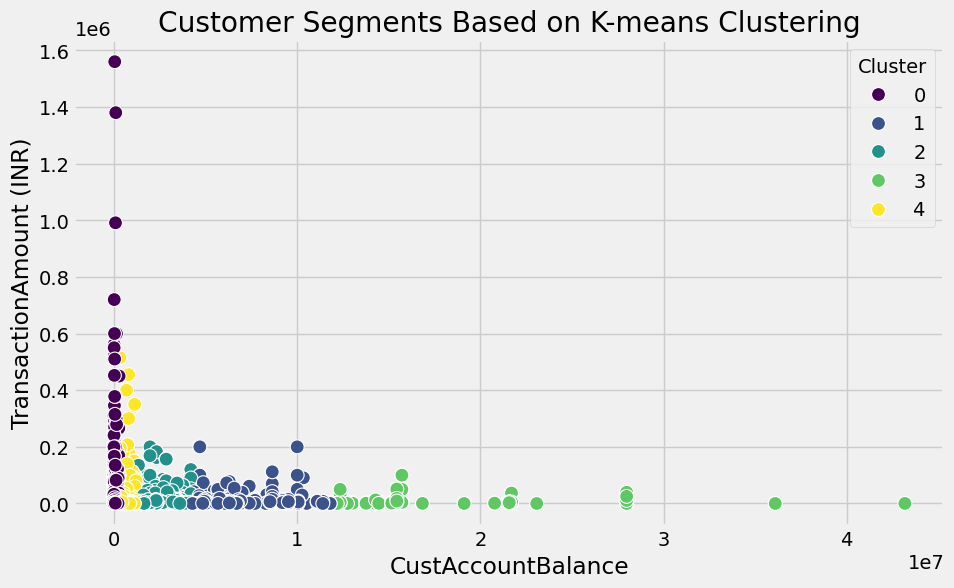

In [112]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)

#Vizuallasdirma
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CustAccountBalance', y='TransactionAmount (INR)', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments Based on K-means Clustering')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()

In [113]:
df.drop(['PC1','PC2'],axis=1,inplace = True)

In [114]:
df

,TransactionID,CustomerID,CustomerDOB,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustLocationFreq,Age,Month,Gender_M,Cluster
0,T1,C5841053,1994-10-01,17819.05,2016-02-08,143207,25.0,1580,22.0,2,0,0
2,T3,C4417068,1996-11-26,17874.44,2016-02-08,142712,459.0,102742,20.0,2,0,0
4,T5,C9031234,1988-03-24,6714.43,2016-02-08,181156,1762.5,12969,28.0,2,0,0
6,T7,C7126560,1992-01-26,973.46,2016-02-08,173806,566.0,102742,24.0,2,0,0
7,T8,C1220223,1982-01-27,95075.54,2016-02-08,170537,148.0,102742,34.0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,7635.19,2016-09-18,184824,799.0,84151,26.0,9,1,0
1048563,T1048564,C6459278,1992-02-20,27311.42,2016-09-18,183734,460.0,4960,24.0,9,1,0
1048564,T1048565,C6412354,1989-05-18,221757.06,2016-09-18,183313,770.0,22976,27.0,9,1,0
1048565,T1048566,C6420483,1978-08-30,10117.87,2016-09-18,184706,1000.0,4442,38.0,9,1,0


In [115]:
df['Cluster'].value_counts()

Cluster
0    843545
4     39392
2      5396
1      1013
3       122
Name: count, dtype: int64

In [116]:
X = df[["CustAccountBalance","TransactionAmount (INR)",'Age']].values

In [117]:
X

array([[1.7819050e+04, 2.5000000e+01, 2.2000000e+01],
       [1.7874440e+04, 4.5900000e+02, 2.0000000e+01],
       [6.7144300e+03, 1.7625000e+03, 2.8000000e+01],
       ...,
       [2.2175706e+05, 7.7000000e+02, 2.7000000e+01],
       [1.0117870e+04, 1.0000000e+03, 3.8000000e+01],
       [7.5734420e+04, 1.1660000e+03, 3.2000000e+01]])

In [120]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [121]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [122]:
kmeans.inertia_

2.0396000572010384e+16

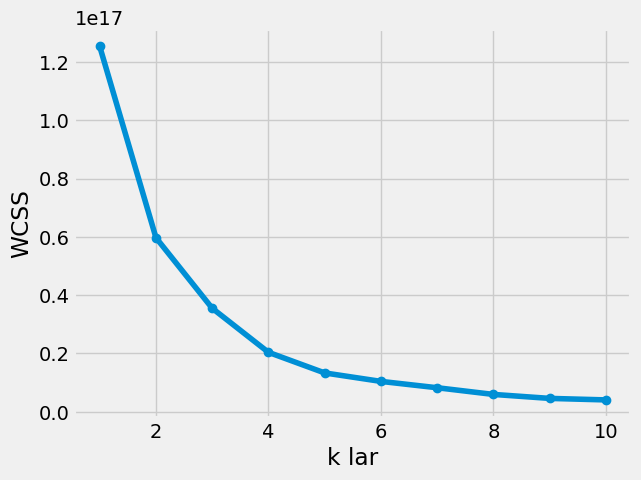

In [123]:
wss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wss[i] = kmeans.inertia_
     
plt.plot(wss.keys(), wss.values(), '-o')
plt.xlabel("k lar")
plt.ylabel('WCSS')
plt.show()

In [124]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [125]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

In [126]:
X[y_kmeans==3,    2]

array([30., 36., 36., ..., 40., 36., 42.])

In [127]:
kmeans.cluster_centers_

array([[1.13936065e+06, 3.24863971e+03, 3.29527084e+01],
       [4.46120120e+04, 1.23501087e+03, 2.87996244e+01],
       [1.75341155e+07, 6.72455485e+03, 3.62307692e+01],
       [5.53257671e+06, 4.74235859e+03, 3.43264177e+01]])

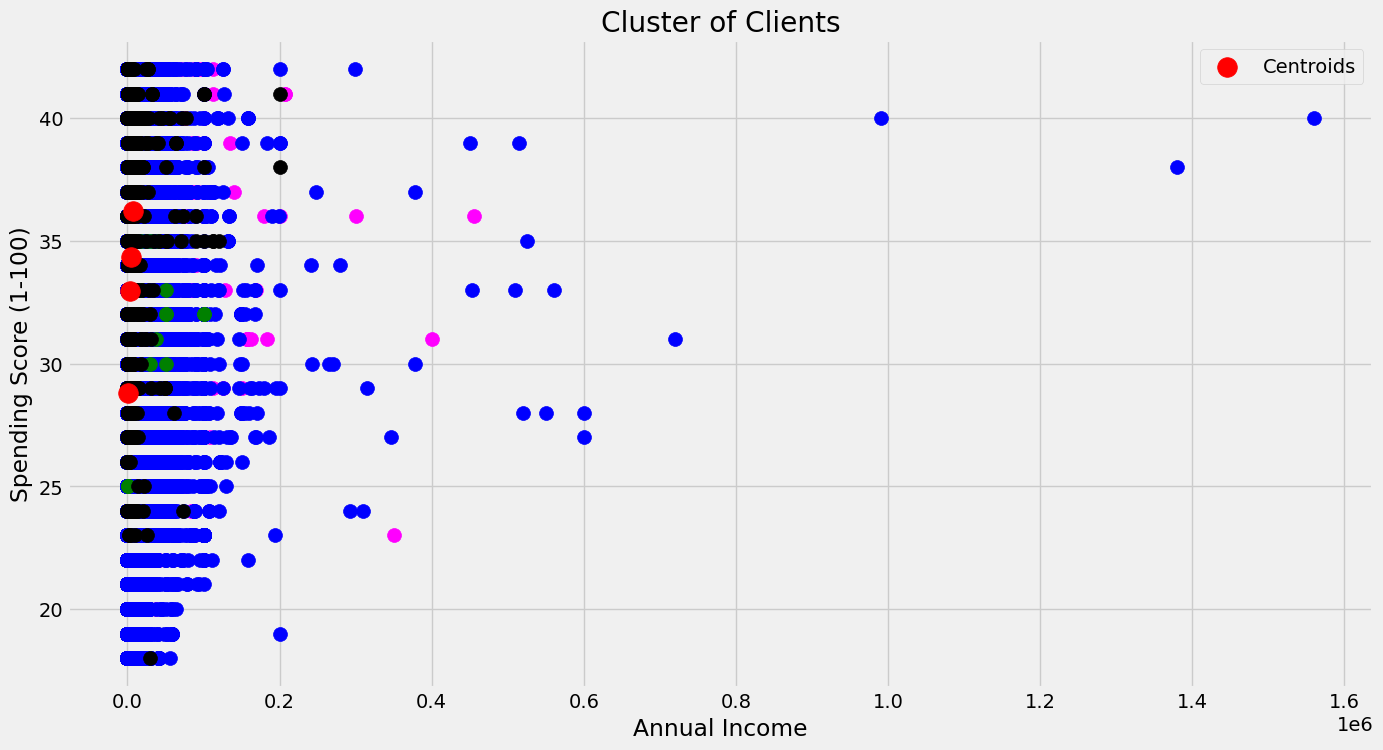

In [128]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,1],X[y_kmeans==0,2],s=100,c='magenta')
plt.scatter(X[y_kmeans==1,1],X[y_kmeans==1,2],s=100,c='blue')
plt.scatter(X[y_kmeans==2,1],X[y_kmeans==2,2],s=100,c='green')
plt.scatter(X[y_kmeans==3,1],X[y_kmeans==3,2],s=100,c='black')
#plt.scatter(X[y_kmeans==4,1],X[y_kmeans==4,2],s=100,c='burlywood',label='Target')
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],s=200,c='red',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [129]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

clustering = AgglomerativeClustering(n_clusters=3,linkage='ward').fit(X[:9000])
clustering
clustering.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs


In [131]:
X = df[["CustAccountBalance","TransactionAmount (INR)",'Age']].values

In [132]:
X

array([[1.7819050e+04, 2.5000000e+01, 2.2000000e+01],
       [1.7874440e+04, 4.5900000e+02, 2.0000000e+01],
       [6.7144300e+03, 1.7625000e+03, 2.8000000e+01],
       ...,
       [2.2175706e+05, 7.7000000e+02, 2.7000000e+01],
       [1.0117870e+04, 1.0000000e+03, 3.8000000e+01],
       [7.5734420e+04, 1.1660000e+03, 3.2000000e+01]])

In [133]:
A = X[:10000]

In [134]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3,  linkage='ward')
labels_=cluster.fit_predict(A)

In [135]:
len(X)

889468

In [136]:
A

array([[17819.05,    25.  ,    22.  ],
       [17874.44,   459.  ,    20.  ],
       [ 6714.43,  1762.5 ,    28.  ],
       ...,
       [15340.78,   188.  ,    21.  ],
       [ 2086.64,    61.  ,    29.  ],
       [17933.33,   572.  ,    25.  ]])

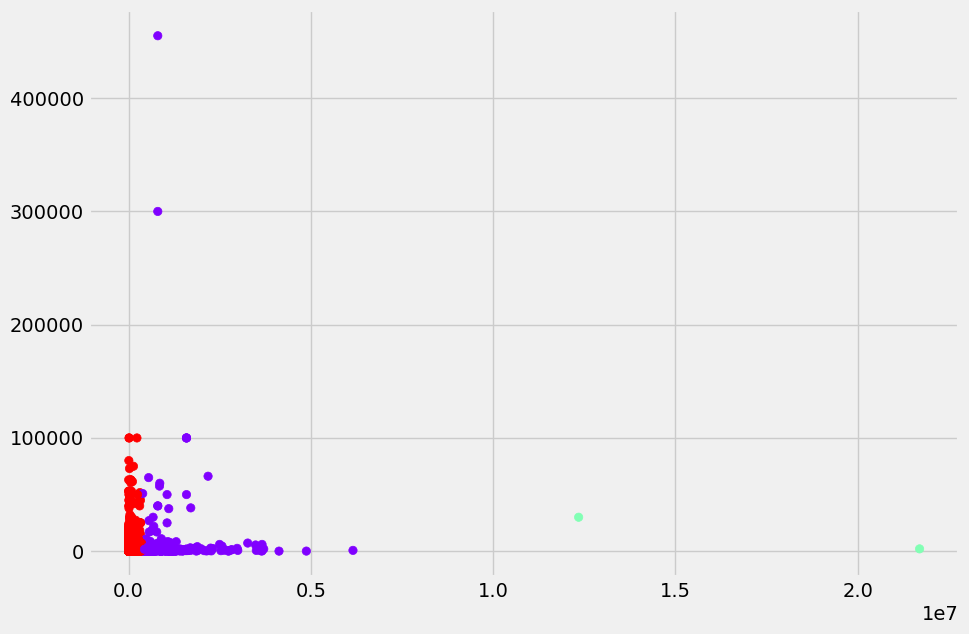

In [137]:
plt.figure(figsize=(10, 7))
plt.scatter(A[:,0], A[:,1], c=cluster.labels_, cmap='rainbow')

In [138]:
df1 = df.loc[:12000]


In [139]:
features = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustLocationFreq', 'Age', 'Month', 'Gender_M']
X = df1[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


agg_clustering = AgglomerativeClustering(n_clusters=3,linkage='complete')
df1['Cluster1'] = agg_clustering.fit_predict(X_scaled)

print(df1)


      TransactionID CustomerID CustomerDOB  CustAccountBalance  \
0                T1   C5841053  1994-10-01            17819.05   
2                T3   C4417068  1996-11-26            17874.44   
4                T5   C9031234  1988-03-24             6714.43   
6                T7   C7126560  1992-01-26              973.46   
7                T8   C1220223  1982-01-27            95075.54   
...             ...        ...         ...                 ...   
11995        T11996   C8837285  1995-02-21             1906.00   
11996        T11997   C3726618  1979-01-10           290318.64   
11997        T11998   C5426545  1991-12-12            38098.53   
11999        T12000   C2942842  1976-08-25              169.67   
12000        T12001   C2830039  1996-09-07               24.03   

      TransactionDate  TransactionTime  TransactionAmount (INR)  \
0          2016-02-08           143207                     25.0   
2          2016-02-08           142712                    459.0   
4     

C:\Users\user2\AppData\Local\Temp\ipykernel_16360\1080174485.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Cluster1'] = agg_clustering.fit_predict(X_scaled)


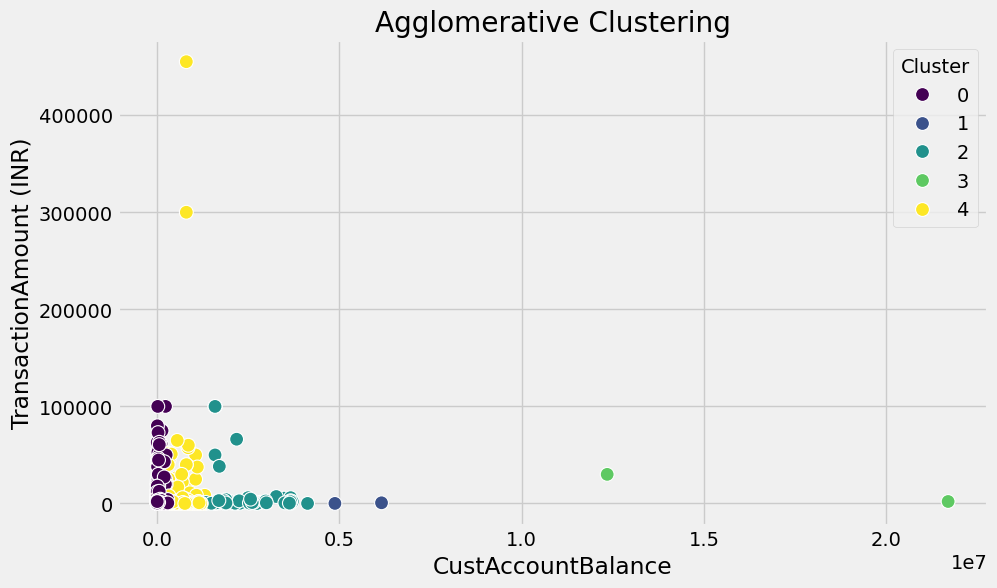

In [140]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='CustAccountBalance', y='TransactionAmount (INR)', hue='Cluster', palette='viridis', s=100)

plt.title('Agglomerative Clustering')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.legend(title='Cluster')
plt.show()

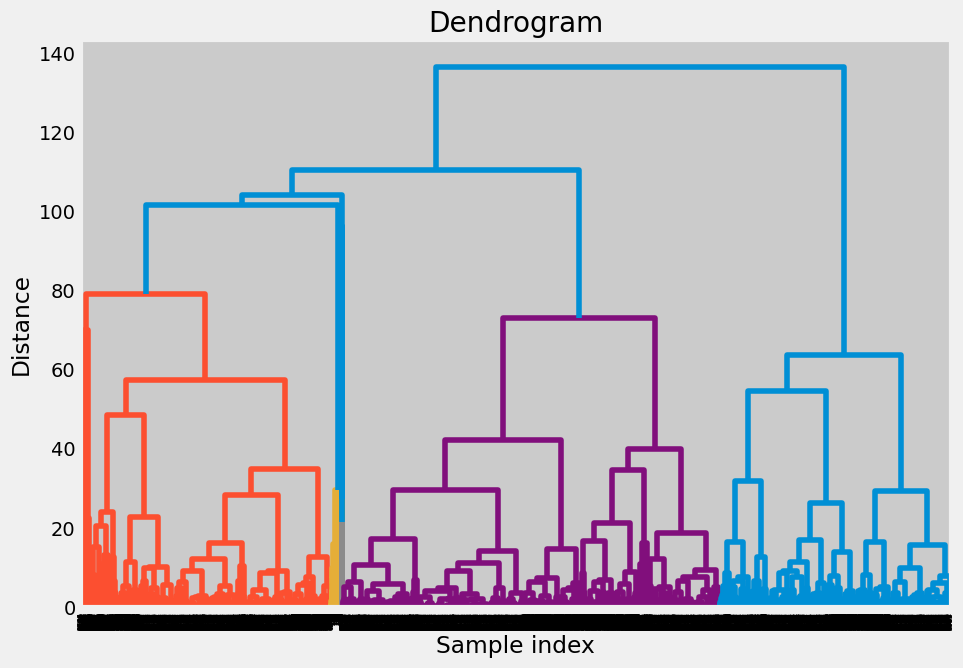

In [141]:
features = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustLocationFreq', 'Age', 'Month', 'Gender_M']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[:10000])


linked = linkage(X_scaled, method='ward')


plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [ ]:
df